# Introduction to Numpy powered by oneAPI

### Learning Obejctives:

- Desribe why replacing inefficient code, such as time consuming loops, wastes resources, and time
- Describe why using Python for highly repetitive small tasks is inefficient
- Describe the additive value of leveraging packages such as Numpy which are powered by oneAPI in a cloud world 
- Describe the importance of keeping oneAPI and 3rd party package such as Numpy, Scipy and others is important
- Enumerate ways in which Numpy accelerates code
- Apply loop replacement methodologies in a variety of scenarios


#### Here is a list of topics we will explore in this module:
- The "WHY", Why use Numpy as replacement for loops?: Its FAST!
- Numpy Universal Functions or ufuncs
- Numpy Broadcasting 
- Numpy Aggregations
- Numpy Where
- Numpy Select
- A quick refernce to Scipy algorithms to set the satge for the next module 

### Replacing Inefficient code
![SLowWadeWater.PNG](Assets/SlowWadeWater.png)

Code that written inefficiently:
- Be less readable (less pythonic)
- Can consume more time
- Waste energy 
- Waste purchased or leased resources

This module will focus on trying to simulatenously make code readbale as well as more efficient as measured by how well we accerlate code examples. While the code exmpale themselves are small examples, the techniques described are application in a wide variety of scenarios in AI.

### Python loops are bad for performance
**Python is great!** Its a great  language for AI. There are many, many advantages in using Python especially for data science.
- easy to program (dont worry about data types and persnicity syntax at least relative to C/C++ and other languges
- FAST for deveoping code!
- leverages huge array of libaries to conquer any domain
- lots of quick answers to common issues in Stack Exchange

#### Python, however, is slow for Massively repeating small tasks - such as found in loops! **Python loops are SLOW**

- Compared to C, C++, Fortran and other typed languages
- Python is forced to look up every occurnace and type of variable in a loop to determine what operations it can perform on that data type
- It cannot usually take advantage of advances in hardware in terms of vector width increases, multiple cores, new instructions from a new HW instruction set, new AI accelerators, effective amd cache meory layout, and more

#### BUT: Python has library remedies to these ills!
- Importing key libnraries shift the burden of computation to highly efficient code
- Numpy, for example, through its focus on elementwise efficient operations, gives indirect access to the efficiencies afforded in "C"  
- libraies included in oneAPI and Numpy, Scipy, Scikit-learn all powered by oneAPI give access to modern advancements in hardware level: access to better cache and memory usage, access to low level vector instructions, and more.
- By leveraging packages such as these powered by oneAPI AND keeping libraries up to date, more capability is added to your underlyig frameworks so that moving code, epsecially in a cloud world, can give you ready access to hardware accerlations, in many cases, without having to modify code this vectorized code
- Routines are written in C (based on CPython framework)
- Numpy arrays are densely packed arrays of homogeneous type. Python lists, by contrast, are arrays of pointers to objects, even when all of them are of the same type. So, you get the benefits of not having to check data types, and you also get locality of reference. Also, many Numpy operations are implemented in C, avoiding the general cost of loops in Python, pointer indirection and per-element dynamic type checking. The speed boost depends on which operations you’re performing. 
            
**Goal of this module: Search and destroy (replace) loops**

Avoid loops if you can - find an alternative if possible. Sometime it cannot be done - true data dependecies may limit our options. But many, many time there are alternatives.


**The problem** 
- Loops isolate your code from hardware and software advances that update frequently.
- They prevent you from effectively using key underlying resources - it is a waste.
- They consume your time!

### Reference:

- [Video:  **Losing your Loops Fast Numerical Computing with NumPy** by Jake VanderPlas ](https://www.youtube.com/watch?v=EEUXKG97YRw). 

- [Book:  **Python Data Science Handbook** by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/). 

- [Book:  **Elegant SciPy: The Art of Scientific Python** by by Juan Nunez-Iglesias, Stéfan van der Walt, Harriet Dashnow](https://www.amazon.com/Elegant-SciPy-Art-Scientific-Python/dp/1491922877)

- [Article:  **The Ultimate NumPy Tutorial for Data Science Beginners**](https://www.analyticsvidhya.com/blog/2020/04/the-ultimate-numpy-tutorial-for-data-science-beginners/) :   by Aniruddha April 28, 2020 at www.analyticsvidhya.com

- [Academic Lecture pdf: **Vectorization** by  Aaron Birkland Cornell CAC](http://www.cac.cornell.edu/education/training/StampedeJune2013/Vectorization-2013_06_18.pdf)

# Exercises (7 in total):

Do a page search for each **Exercise** in this notebook. Complete All seven exercises. Code in cells above each exercise may give insight into a solid approach

## Why use Numpy as replacement for loops?

## Its FAST!

In this section we will explore a smattering a different Numpy approaches that lead to accelerations over naive loops

The bigger (more iterations) of a loop the better Numpy gets and the bigger (more dimensions of data) the better Numpy gets as a general rule.

Ultimately, we are hunting to **"BIG LOOPS"**. What is a BIG LOOP? One that consumes a lot of time! Sometimes, even a loop with somehat smaller iteration can be time consuming because each iteration takes long by itself. Well call these BIG LOOP too.

#### Compare different ways of computing Log10 of a lager vector

In this next sectoin, we will create a list of 1-million random floating point numbers. Then we will use **for** loop to iterate over its elements, take **Log10** and store the value in another list. We'll compare the execution speed with that of a direct NumPy Log10 operation.

for this log10 problem, We will compare
- Naive loop
- Map function
- List Comprehension
- Numpy

#### Import updated libraries

In [ ]:

import numpy as np
from math import log10 as lg10
import time
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### Create a list of 1 million numbers

In [ ]:
N = 100000000 # Number of records to process
acceleration = [] # Empty list to store operation speeds (time taken)
l1 = list(100*(np.random.random(N))+1)

#### Create a NumPy ndarray object from that list

This is the first step towards vectorization

In [ ]:
a1 = np.array(l1)

# Time a *Naive* For loop computing Log

This one has a somewhat expensive **log10 function** that is being called on each element

We append the results to the list

In [ ]:
# Create a blank list for appending elements

timing = {} # Just a blank dictionary to append to

t1=time.time()
l2 = []
for item in l1:
    l2.append(lg10(item))
t2 = time.time()
print("With for loop and appending it took {} seconds".format(t2-t1))
timing['loop'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

# Time the *Map* function

One Python alternative to looping is the **map function** that applies a function to each element in a list

In [ ]:
def op1(x):
    return (lg10(x))

t1=time.time()

l2=list(map(op1,l1))

t2 = time.time()
print("With list(map) functional method it took {} seconds".format(t2-t1))
timing['map'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

# Time a *List comprehension*

One very popular Python alternative to use a list comprehension instead of the loop

In [ ]:
t1=time.time()
l2 = [lg10(i+1) for i in range(len(l1))]
t2 = time.time()
print("With list comprehension, it took {} seconds".format(t2-t1))
timing['list comprehension'] = (t2-t1)
print("First few elements of the resulting array:", l2[:4])

# Time *NumPy operation* (vectorized array)

In [ ]:
t1=time.time()
a2=np.log10(a1)
t2 = time.time()
print("With direct NumPy log10 method it took {} seconds".format(t2-t1))
timing['numpy'] = (t2-t1)
l3 = list(a2)
print("First few elements of the resulting array:", l3[:4])

### Plot the time taken by each operation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Plot of various method of computing Log10, for {:,} elements".format(a1.shape[0]))
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.xticks(rotation=-60)
plt.grid(True)
plt.bar(x = range(len(timing)), height=timing.values(), align='center', tick_label=list(timing.keys()))
print('Speedup : {:4.0f} X'.format(timing['loop']/timing['numpy']))

We see the evidence that NumPy operations over ndarray objects are much faster than regular Python math operations. The exact speed of regular Python operations vary a little but they are almost always much slower compared to the vectorized NumPy operation. This is primarily due to memory layout and having to interpret datatypes in every iteration

# Shift a vector - Time Series Prediction Task

In AI, we oftern need to shift data. For example in time series prediction we typically want to predict a later value in a time sequence, given earlier available feature data. We often select a target variable that is time shifted to predict later labels in time.

Suppose we want to take a vector, a column of numbers, and shift them by a constant. Appedn the last element of the list to be zero.

Naive approach with for loop **b[i] = a[i+1]**

In [ ]:
# try naive loop
num = 100000001
a = np.linspace(0, num - 1, num=num)
b = np.ndarray(num-1)

timing = {}

t1=time.time()

for i in range(len(a)-1):
    b[i] = a[i+1]

t2=time.time()
print("shift b w loop {} secs".format(t2-t1))
timing['loop'] = (t2-t1)
b[:2], b[-2:]

List comprehensions are generally faster than explicit for loops

In [ ]:
# try list comprehension 
t1=time.time()

b = [a[i+1] for i in range(len(a)-1)] # shift b by 1

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['list comprehension'] = (t2-t1)
b[:2], b[-2:]

Use Numpy ufuncs such as roll and delete

In [ ]:
# try ufunc np.roll
t1=time.time()

b = np.delete( np.roll(a,-1) , -1)  # numpy roll and delete last value

t2=time.time()
print("shift b {} secs".format(t2-t1))
timing['numpy'] = (t2-t1)
b[:2], b[-2:]

Plot the results

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process {:,} records in seconds".format(num),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

# Numpy Universal Functions (ufuncs)

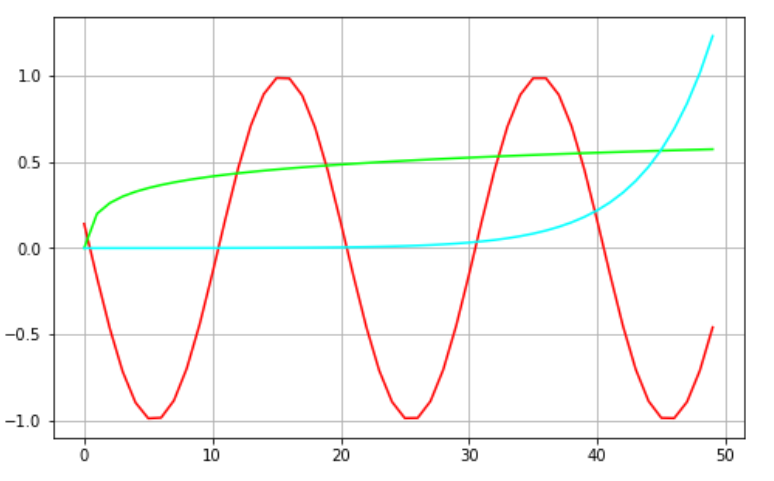


**Functions that operate element by element on whole arrays.**

A [universal function](https://numpy.org/doc/stable/reference/ufuncs.html) (or ufunc for short) is a function that operates on ndarrays in an element-by-element fashion, supporting array broadcasting, type casting, and several other standard features. That is, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs and produces a fixed number of specific outputs. For detailed information on universal functions, see Universal functions (ufunc) basics.

### Available ufuncs
There are currently more than [60 universal functions](https://numpy.org/doc/stable/reference/ufuncs.html)  defined in numpy on one or more types, covering a wide variety of operations. 
- **Methods for reductions:** reduce, accumulate, outer, ...
- **Math Functions:** log, exp, matmul, mod, multiply, add, ...
- **Trigonometric functions:** sin, cosine, tan, arcsin, hypot, ...
- **Bit-twiddling functions:** bitwise_and, bitwise_or, invert, left_shift, ...
- **Comparison functions:** greater, less_than, not_equal, logical_and ...
- **Floating functions:** isfinite, isinf, isnan, isnat, fabs, ... 

** Infix notation** (looks like simple math on arrays)
- **a + b**  Some of these ufuncs are called automatically on arrays when the relevant infix notation is used (e.g., add(a, b) is called internally when a + b is written and a or b is an ndarray).
- You may still want to use the ufunc call in order to use the optional output argument(s) to place the output(s) in an object (or objects) of your choice.


Many ufuncs also have built in reductions that can be applied

- One common operation used in AI frequently is maximum or minimum

- The Python function max() will find the maximum over a one-dimensional array, but it will do so using a slower sequence interface. 

- The reduce method of the maximum ufunc is much faster. 

- Also, the max() method will not give answers you might expect for arrays with greater than one dimension. 

- The reduce method of minimum also allows you to compute a total minimum over an array.

Here are simple examples for **log, exp cumulative sums and products**, etc:

In [ ]:
# Muliple all elements in a vector together
print("multiply all elements of [2,3,5]" )
print(np.multiply.reduce([2,3,5]))

X = np.arange(8).reshape((2,2,2))
print("\nContents of X")
print(X)

print("\nSum all values of X")
print(np.sum(X))

print("\nAdd all values of X to itself")
print(np.add(X, X))

print("\nAdd all values of X by column")
print(np.add.reduce(X, axis = 0))

print("\nAdd all values of X by row")
print(np.add.reduce(X, axis = 1))


### Naive Loop:

Apply **exp** to every element of array **a**

In [ ]:
import math
L = 710
a = np.arange(1, L) # get sequence of numbers
collectExp1 = []
t1 = time.time()
timing = {}
for i in range(L-1):
    collectExp1.append(math.exp(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopExp'] = t2 - t1

### Numpy Loop:

Apply **exp** to every element of array **a**

In [ ]:
t1 = time.time()
collectExp2 = np.exp(a)
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyExp'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopExp']/timing['NumpyExp']))

### Naive Loop:

Apply **log**  to every element of array **a**

In [ ]:
import math
L = 1000000
a = np.arange(1, L) # get sequence of numbers
collectLogs1 = []
t1 = time.time()
timing = {}
timing = {}
for i in range(L-1):
    collectLogs1.append(math.log(a[i]))
t2 = time.time()
print("elapsed time: ", t2-t1)
timing['LoopLogs'] = t2 - t1

## Exercise:

Complete writing the equivalent Numpy fnctionality to the loop version above to compute **log10** for every element of array **a**

In [ ]:
t1 = time.time()
### Complete the code below #####


#####################

t2 = time.time()
print("elapsed time: ", t2-t1)
timing['NumpyLog'] = t2 - t1
print("acceleation: {:4.0f} X".format( timing['LoopLogs']/timing['NumpyLog']))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy log10 [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

### Cummulative sums and products

Numpy as functions to perform cummulative sums and prodcuts also

Examine the loop below to add up all numbers in an array and keep track of the running sums

In [ ]:
L = 100000000
a = np.arange(L) # get sequence of numbers
timing = {}
t1 = time.time()
S = []
s = 0
for el in a:
    s += el
    S.append(s)
t2 = time.time()
timing['loop cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 

# Exercise:

Write a Numpy vectorized cell below to compute the running sum **S**, similar to loop above for input array **a**

In [ ]:

a = np.arange(L) # get sequence of numbers

t1 = time.time()
##### insert single line numpy code below ####


##############################################
t2 = time.time()
timing['numpy cumulative sum'] = t2 - t1
print("elapsed time: ", t2-t1)
print("a \n", a[:6])
print("S[:6]\n",S[:6]) 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy cumsum [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation = -60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

Whatever loopy code you have - spend time looking for alternatives such as this. The acceleration can be exrardinary

# Numpy Aggregation

Aggregation is where we operate on an array and generate resulting data with a smaller dimension than the original array

The aggregations can typically be done using different axes to control the direction

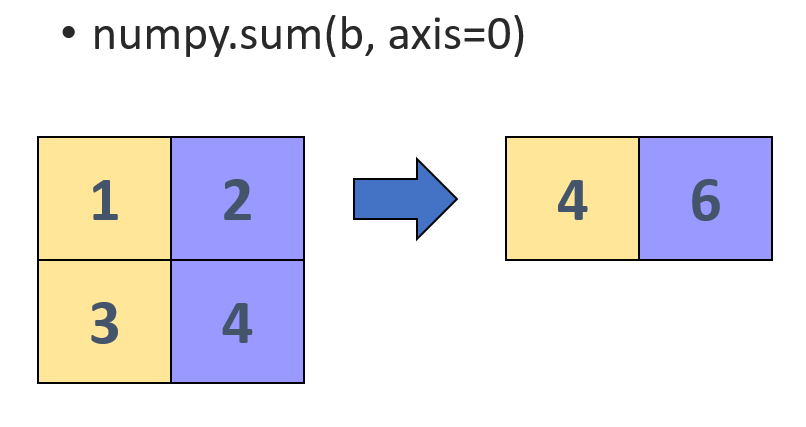

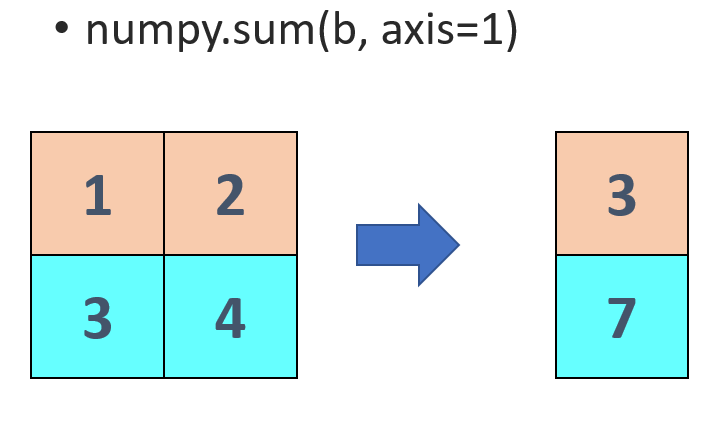

Common examples in AI are:
- min
- max
- sum
- mean
- std ... among others

----------------------------------------------------------------------------------
| Functions | Description | 
| --- | --- |
| np.mean() | Compute the arithmetic mean along the specified axis. |
| np.std() | Compute the standard deviation along the specified axis. |
| np.var() | Compute the variance along the specified axis. |
| np.sum() | Sum of array elements over a given axis. |
| np.prod() | Return the product of array elements over a given axis. |
| np.cumsum() | Return the cumulative sum of the elements along a given axis. |
| np.cumprod() | Return the cumulative product of elements along a given axis. |
| np.min(), np.max() | Return the minimum / maximum of an array or minimum along an axis. |
| np.argmin(), np.argmax() | Returns the indices of the minimum / maximum values along an axis |
| np.all() | Test whether all array elements along a given axis evaluate to True. |
| np.any() | Test whether any array element along a given axis evaluates to True. |


Specialty calcualtions exist so always eamine your code with a view to simply and remove loops with off the shelf solutions

For example, in AI there re times we need to add the values of the diagonal of special arrays.

For very long vectors these will accelerate noticibly and more so for larger multdimensional arrays

Below is a naive approach for addng all the diagnoal elements of a smallish array of 1000 x 1000. So the accerlation is reasonable but not outlandish


In [ ]:
A = np.arange(1_000_000).reshape(1000, 1000)
Diag = 0

t1 = time.time()
for i in range(len(A)):
    for j in range(len(A)): 
        if i == j:
            Diag += A[i,j]
t2 = time.time()
Elapsed_Diag_base = t2-t1
print("elapsed time: ", Elapsed_Diag_base)
print("Diag: ", Diag)

## Exercise:

Use a search engine to find numpy method to find the sum of the diagonals of this array.
- Hint: trace

In [ ]:
t1 = time.time()
#### insert your code below #####


#################################    
t2 = time.time()
Elapsed_Diag_numpy = t2 - t1
print("elapsed time: ", Elapsed_Diag_numpy)
print("Diag: ", Diag)
print("Acceleration: {:4.0f}X".format(Elapsed_Diag_base/Elapsed_Diag_numpy))

# Numpy Broadcasting

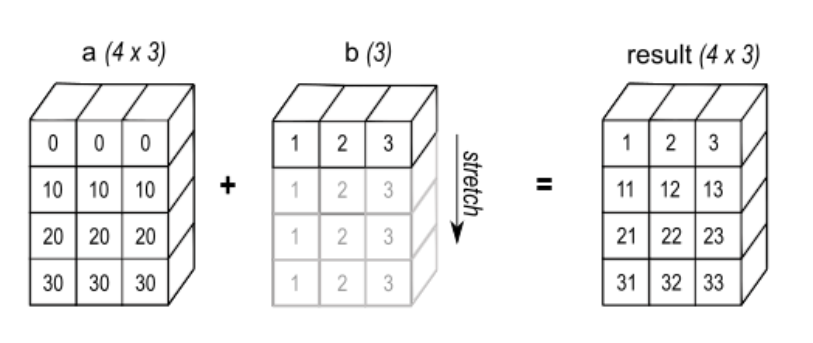


"The term **broadcasting** describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes."

In a **Linear Algebra class** there is no such notion at broadcasting

In Linear Algebra:
- Two matrices can be added or subtracted ONLY if their dimensions are exactly the same (lets say (both MxN)
- Two matrices can be multiplied ONLY if their inner dimensions are the same A(5,2) x B (2,7) = (5,7)

In Numpy, **broadcasting** is a way to speed up comptation by essentially making the dimensions the correct size by copying data from the smaller dimension until the resulting array is suitable for Linear Algebra addition or multiplication.

The one exception: Outer product is the same in linear Algebra and Numpy, at least in the case of (Nx1) x (1xN) = (NxN)

[Broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html) SciPy.org

### Broadcasting rules and conditions:

For a set of arrays can be considered ‘broadcastable’, if this set of conditions that are met.

1. The shape of the arrays are the same or the ending dimensions for both arrays match

1. If an array has a different number of dimension to the another array, then the array with the lesser dimension is extended by 1 until the number of dimension of both arrays are equal

1. If two arrays are to be broadcastable, then the array with dimension size of 1 is to behave in a manner that enables the array with lesser dimension to be expanded by duplication to the length of the second array.  (eg. a (3,1) is promoted to (3,3) by copying to fill dimension

For better intuition about broadcasting - watch this excellent presentation by:
[Jake Vanderplas **Losing your Loops Fast Numerical Computing with NumPy**](https://www.youtube.com/watch?v=EEUXKG97YRw).

In [ ]:
# Condition 1: The shape of the arrays are the same or the ending dimensions for both arrays match
x = np.array([3,2,1])
y = np.array([6,5,2])
z = x * y
print("x.shape is", x.shape)

print("y.shape is", y.shape)

print("x.shape == y.shape:",x.shape == y.shape)

print("x: ",z)

In [ ]:
# Condition 2
x = np.array([3,2,1,2,6,4,5,7,9]).reshape(3,3)
y = np.array([6,5,2]) # has shape (3,) a single dimension

print("x.shape: ",x.shape)
print("x: \n",x)

print("y.shape: \n", y.shape)
print("y: \n",y)
print("y.shape extended by one internally (3,1)\n")

z = x * y  # y has a simension added to be 3,1, then filled out by copy to be 3,3
print("z: \n", z)
# multiplies element by element in a row by row fashion, 
# [3,2,1] x [6,5,2] =[18,10,2]

In [ ]:
# The array 'x' has a length of 6 and the array 'y' has length of 1, 
# by following condition 3, the array 'y' has been stretched 6 times 
# to match the array 'x' during broadcasting.

x = np.array([3,2,1,2,6,4]*3).reshape(6,3)
print("x: \n", x)

y = np.array([6,5,2]).reshape(1,3)  # has shape (1,3) a single dimension
print("y: \n", y)

print("len(x)", len(x))

print("len(y)", len(y))

print("x + y\n", x + y) # adds y to each row of X


In AI we use this sometime to normalize data - subtract the mean from an array, then divide by the standard deviation

## Example of normalizing California housing dataset

This example combines Numpy **Aggregations** with **Broadcasting**

Many times, a loop replacement does not impact preformance as much, as in the case below where the **Numpy Broadcast/Aggregation** method is perhaps **only 14% faster**.

But the **Numpy vectorized** code is **MUCH more readable** and easier to debug and explain

Here's how the broadcasting works here for the Standardization method:
- X is two dimensional array
- X.mean(axis = 0) is a vector (1,3)
- X.std(axis = 0) is a vector (1,3)
- both small vectors (1,3) are broadcast up to the dimension of X (3,3)
- in Linear algebra class you have to add/subtract arrays of same dimensions A is two dimensional array

Note: the scikit-learn stardarize is about 2x faster that these methods. Always look to use optimized libraries such as these in defeerence to your own loops but ALSO in deference to your own Numpy rolled one liners - but let performance and readability be your guide here.


In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data.to_numpy()

def standardizeLoop(B): # about 15 lines of code, more to go wrong
    L = len(B)
    tmp = np.zeros(B.shape)

    for col in range(L):
        mean = 0
        total = 0
        for row in range(L): # compute mean for col
            total += B[row, col]
        mean = total/L
        diff2 = 0
        for row in range(L):
            d = B[row,col] - mean
            diff2 += d*d
            tmp[row, col] = B[row, col] - mean
        for row in range(L):
            tmp[row, col] = tmp[row, col]/np.sqrt(diff2/(L))
    return tmp

def standardize(A): # one line of code
#     about 14% faster then loop above
#     A is two dimensional array
#     A.mean(axis = 0) is a vector (1,3)
#     A.std(axis = 0) is a vector (1,3)
#     both scalars are broadcast up to the dimension of A (3,3)
#     in Linear algebra Class you have to add/subtract arrays of same dimensions
    return (A - A.mean(axis=0))/A.std(axis=0)


## Exercise:

Use broadcasting to create a 10x10 array containing the multiplication table for the numbers 1 to 10

#### Hint:

- multiply a **(10,1)** vector by a **(1,10)** vector - this is an **outer product**
- think reshape
- search engine ;-)

In [ ]:
A = np.arange(1, 11)
print(A)

#################################################################################
#### add single line of code numpy broadcasting (reshape the arrays) and multiply


#################################################################################

### Naive loop outer product

In [ ]:
N = 10000
timing = {}
A = np.arange(0, N)
t1 = time.time()
B = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        B[i,j] = (i+1)*(j+1)
t2 = time.time()
loop = t2-t1
timing['loop'] = loop
print("Elapsed ", t2-t1)

### Numpy Broadcast outer product

In [ ]:
t1 = time.time()
B = A.reshape(N,1) * A

t2 = time.time()
broadcast = t2 - t1
print("Elapsed ", t2-t1)
timing['broadcast'] = broadcast
print("Numpy Broadcast Acceleration: ", loop/broadcast)

### Plot speedup for Broadcasting

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Measure acceleration of looping versus Numpy Broadcast [Lower is better]",fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation = -60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))
print("Speedup {:4.0f} X".format( timing['loop']/timing['broadcast']))

# *Numpy.where* to handle simple conditional logic

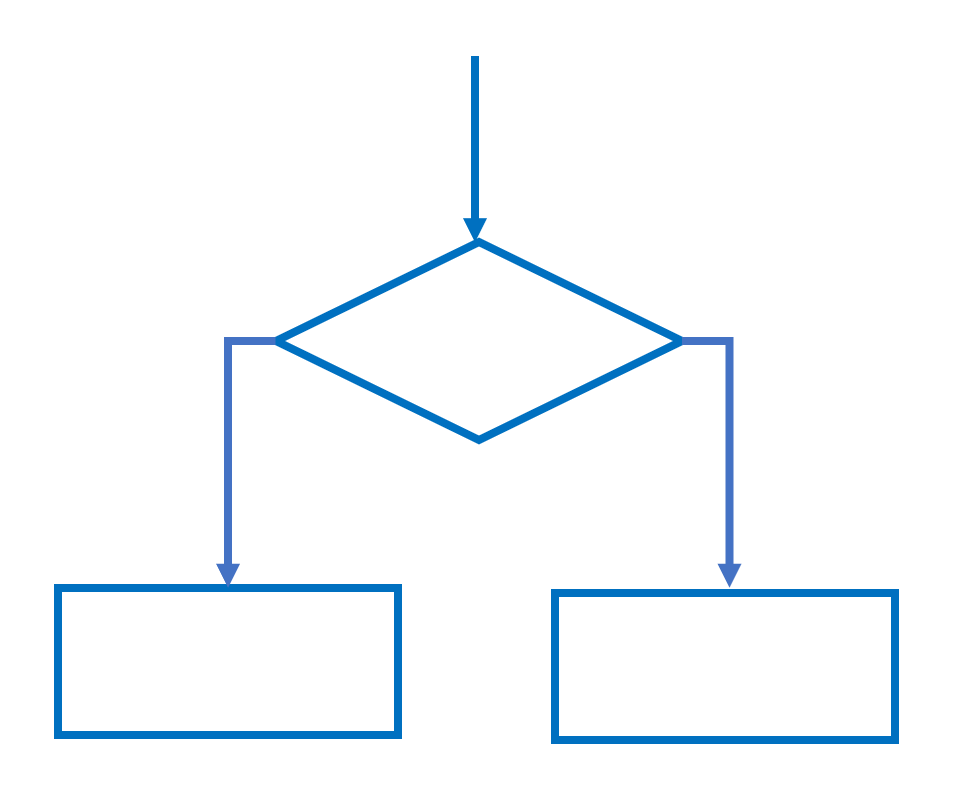

One thing that could prevent us from effectively getting vector performance when converting a loop to a vector approach is when the original loop has if then else statements in it - called conditional logic

The Numpy Where allows us  to tackle conditional loops in a fast vectorized way

Apply conditional logic to an array to create a new column orupdate contents of an existing column

**Syntax:**
- numpy.where(condition, [x, y, ]/)
- Return elements chosen from x or y depending on condition.

To understand what numpy where does, look at the simple example below
See a simple example below to add 50 to all elements currently greater than 5:

In [ ]:
a = np.arange(10)
np.where(a > 5, a + 50, a )
# if a > 5 then return a + 50
# else return a

This could come n handy for many AI applications, but let's choose labeling data

There may be better wyas to binarize data but here is a simple example of converting conrinuous data into  categorical values

arr = **np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])**

Let's say all values 10 and above represent a medical parameter threshold that indicates further testing, while values below 10 indicate normal range

We might like to print the values as words such as 
**['More Testing', 'Normal', 'More Testing', 'More Testing', ...]**



In [ ]:
arr = np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])
np.where(arr < 10, 'Normal', 'More Testing')

or we could binarize data for use in a classifier

In [ ]:
# Simple Numpy Binarizer Discretizer
# convert continous data to discrete integer bins
arr = np.array([11, 1.2, 12, 13, 14, 7.3, 5.4, 12.5])
print(np.where(arr < 6, 0, np.where(arr < 12, 1, 2)))


### Numpy Where to find rows and columns of conditions

Given a mask of TRUE/FALSE values, we will 
- generate  a new array with a 1 at every location TRUE is located
- generate a -1 at every location a FALSE is located

**Apply a mask**

In [ ]:
#Apply a mask of True/False array to select or manipulate elements
a = np.ones((3,3))  # a contains all 1's

print("initial array a\n", a)
# Given a mask of true/ false values, we will generate 
# a new array with a 1 at every location TRUE is located
# a -1 at every location a FALSE is located
mask = [[False,True,True],[False,True,False],[True,False,True]]
print("\nmask")
for el in mask: # simple loop to print the mask
    print(el)
               
testing_array = np.where(mask,a,-a)

print("\ntesting_array\n",testing_array)

# now we can find where all the ones are by row and column
print("row index (where ones are): ",np.where(testing_array > 0)[0])
print("col index (where ones are): ",np.where(testing_array > 0)[1])

This can be used the other way to **create a mask** given a conidtion or threshold

In [ ]:
# create a mask for indexing, to later manipulate arrays
a = np.ones((3,3))  # a contains all 1's

print("initial array a\n", a)
               
mask = [[False,True,True],[False,True,False],[True,False,True]]
print("\nmask")
for el in mask: # simple loop to print the mask
    print(el)
    
testing_array = np.where(mask,a,-a)

print("\ntesting_array\n",testing_array)

WentTheOtherWay = np.where(testing_array > 0,True, False)

print("\nWentTheOtherWay\n",WentTheOtherWay)

# now we can find where all the ones are by row and column
print("row index (where ones are): ",np.where(WentTheOtherWay > 0)[0])
print("col index (where ones are): ",np.where(WentTheOtherWay > 0)[1])

## Numpy.where Multiplication Table Example

Find all locations of a value in a multiplication table

Find all(rows, cols) of the value 24 a multiplication table 

In [ ]:
numLine = np.arange(1, 11).reshape(10,1)
MultiplicationTable = numLine * numLine.T
MultiplicationTable
np.where( MultiplicationTable == 24)

# Exercise:

Find all(rows, cols) of (all **multiples of **12 or all multiples of 9) in a 10x10 multiplication table and make all other values 0. Preserve the first row and first column as readable indexes for the table as follows:

In [ ]:
## one solution - preserves the indexing edges for easy checking
res = 0
res

## Numpy Where applied to California Housing data

In AI context, this could be applying categorical classifier to otherwise continuous values. For example, california hosugin dataset the target price varibale is continuous.

## Fictitious scenario

A new stimulous package is considered whereby new house buyers will be given a couon worth 50,000 off toward purchase of hosues in California whose price (prior to coupon) is between 250,0000 and 350,000. Other prices will be unaffected. Generate array with the adjusted targets


In [ ]:
# Ficticious scenario:
buyerPriceRangeLo = 250_000/100_000
buyerPriceRangeHi= 350_000/100_000
T = california_housing.target.to_numpy() 
t1 = time.time()
timing = {}
New = np.empty_like(T)
for i in range(len(T)):
    if ( (T[i] < buyerPriceRangeHi) & (T[i] >= buyerPriceRangeLo) ):
        New[i] = T[i] - 50_000/100_000
    else:
        New[i] = T[i]
t2 = time.time()
plt.title( "California Housing Dataset - conditional Logic Applied")
plt.scatter(T, New, color = 'b')
plt.grid()
print("time elapsed: ", t2-t1)
timing['Loop'] = t2-t1

## Excercise:

Duplicate the above condition using a Numpy.Where 

In [ ]:
t1 = time.time()
#############################################################################
### Exercise: Addone moddify code below to compute same results as above loop
#New = np.where(() & (), (), ()) 
New = np.where((T < buyerPriceRangeHi) & (T >= buyerPriceRangeLo), T - 50_000/100_000, T ) 

##############################################################################
t2 = time.time()

plt.scatter(T, New, color = 'r')
plt.grid()
print("time elapsed: ", t2-t1)
timing['np.where'] = t2-t1
print("Speedup: {:4.1f}X".format( timing['Loop']/timing['np.where']))

As you can see, we generated the same data with Numpy where as we did woth the original loop but we did so 13X faster (the speedup amount may vary a bit)

# Numpy Select to handle conditional logic


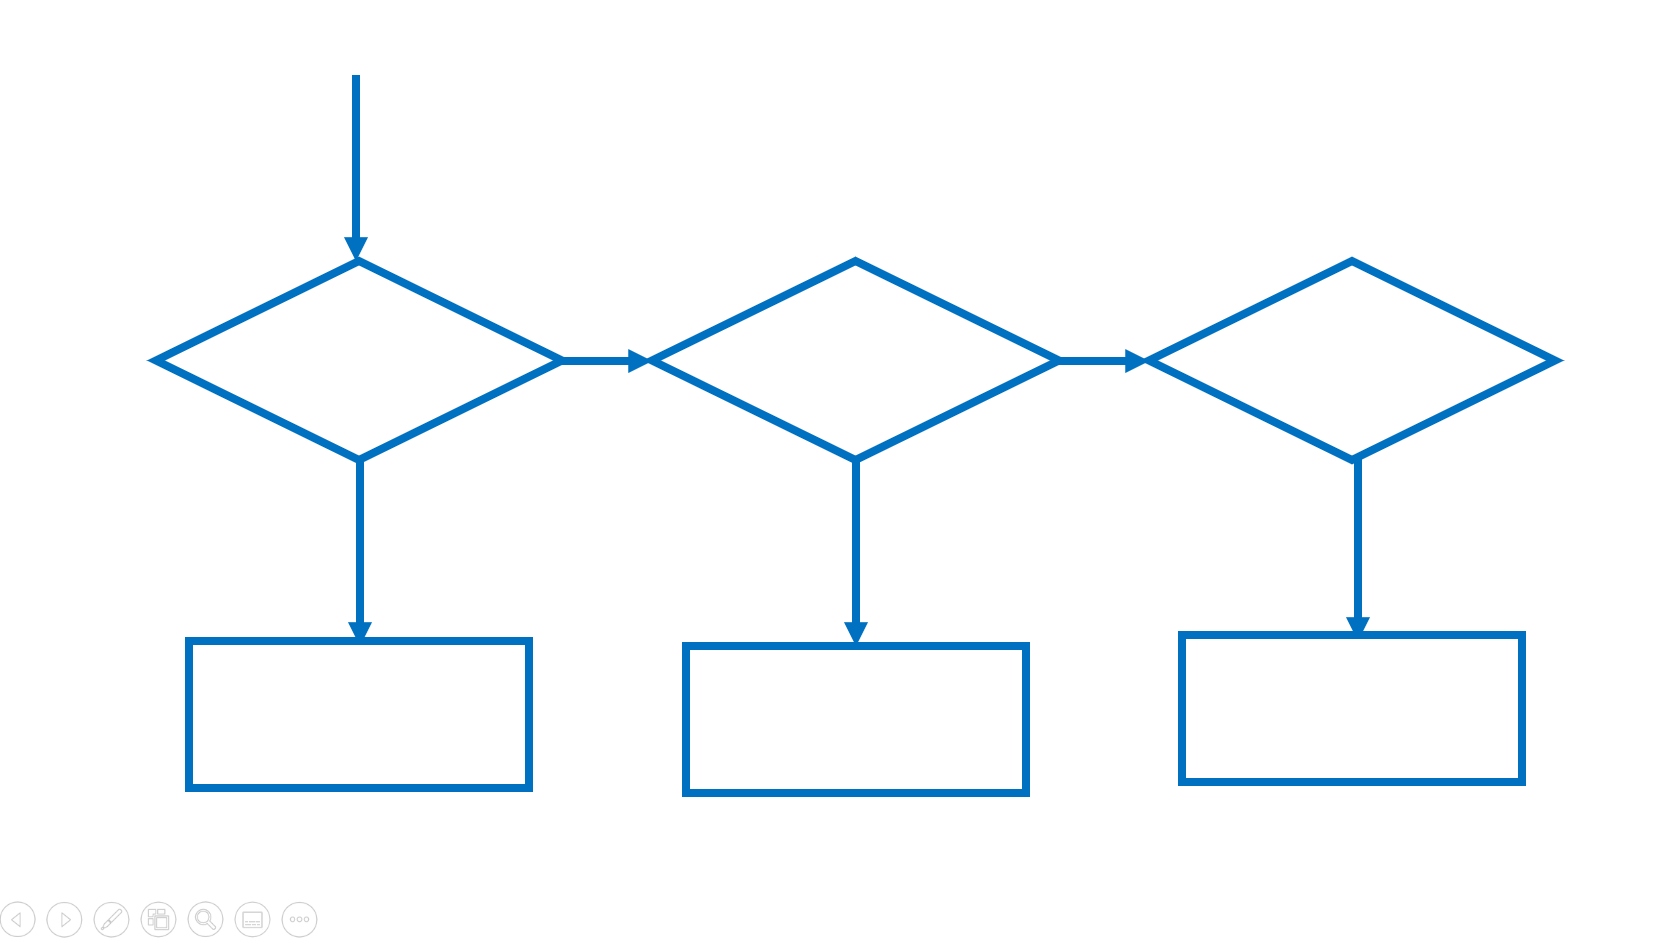

Apply conditional logic to an array to create a new column orupdate contents of an existing column. This method handles more complex conditional sceanrios than numpy where.

**Syntax:**
- [numpy.select(condlist, choicelist, default=0)[source]
- Return an array drawn from elements in choicelist, depending on conditions.

function return an array drawn from elements in choicelist, depending on conditions.

This is very useful function for handing conditionals that otherwise slow down and map or apply, or else add complexity in reading the code

First we will create some new data


In [ ]:
import numpy as np
import time

BIG = 10_000_000

np.random.seed(2022)
A = np.random.randint(0, 11, size=(BIG, 6))

Find Large loop iteration loop2

If they contain conditional logic:
- consider np.where or np.select

else
- Try to find a Numpy replacement using ufuncs, aggergations, etc

Below is a loop consuming 100,000 iterations, with a messy set of conditions

Look for a way to summarize these conditions using a numpy select statement if possible

# Brute Force Approach (Big Loop)

In [ ]:
timing = {}
t1 = time.time()
for i in range(BIG):
    if A[i,4] == 10:
        A[i,5] =  A[i,2] * A[i,3]
    elif (A[i,4] < 10) and (A[i,4] >=5):
        A[i,5] =   A[i,2] + A[i,3]
    elif A[i,4] < 5:
        A[i,5] =   A[i,0] + A[i,1]
t2 = time.time()
baseTime = t2- t1
print(A[:5,:])
print("time: ", baseTime)
timing['Naive Loop'] = t2 - t1

# Try Vectorizing with masks 

Just remove the references to i and remove the loop, create mask for each condition


In [ ]:
# Try Vectorizing simply
t1 = time.time()
mask1 = A[:,4] == 10
A[mask1,5] =  A[mask1,2] * A[mask1,3]
mask2 = ((A[:,4].any() < 10) and (A[:,4].any() >=5))
A[mask2,5] =   A[mask2,2] + A[mask2,3]
mask3 = A[:,4].any() < 5
A[mask3,5] =   A[mask3,0] + A[mask3,1]
t2 = time.time()
print(A[:5,:])
print("time :", t2-t1)

fastest_time = t2-t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))
timing['Vector Masks'] = t2 - t1

# Try Vectorizing with select

### Much cleaner logic

put condition inside a list of tuples
put execution choice inside a list of tuples
result = np.select(condition, choice, default)


In [ ]:
# np.select(condlist, choicelist, default=0)
t1 = time.time()

condition = [ (A[:,4]  < 10) & (A[:,4] >= 5),
              ( A[:,4] < 5)]
choice = [ (A[:,2] + A[:,3]), 
           (A[:,0] + A[:,1] ) ]
default = [(A[:,2] * A[:,3])]
A[:,5] = np.select(condition, choice, default= default )

t2 = time.time()
print(A[:5,:])
print("time :", t2-t1)
fastest_time = t2-t1
Speedup = baseTime / fastest_time
print("Speed up: {:4.0f} X".format(Speedup))
timing['Numpy Select'] = t2 - t1

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Time taken to process {:,} records in seconds".format(num),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = list(timing.keys()), height= list(timing.values()), align='center',tick_label=list(timing.keys()))

## Exercise: Numpy Select

Find all(rows, cols) of (all multiples of 12, 15, 21) in a multiplication table and make all other values 0 using numpy select

In [ ]:
# numpy.select(condlist, choicelist, default)
numLine = np.arange(1, 11).reshape(10,1)
multT = numLine * numLine.T

# condition = [(), (), ()]
# choice = [(), (), ()]
# default =[()]
# res = np.select(condition, choice, default)

# res[0,:] = MultiplicationTable[0,:]  # put edges back in to check result
# res[:,0] = MultiplicationTable[:,0]  # put edges back in to check result
# res

In [ ]:
# numpy.select(condlist, choicelist, default=0)
# same example but display the edges as integer sequence
#res = np.where( MultiplicationTable%12 == 0, MultiplicationTable, 0)

numLine = np.arange(1, 11).reshape(10,1)
multT = numLine * numLine.T

condition = [(multT%12 == 0), (multT%15 == 0), (multT%21 == 0)]
choice = [(multT), (multT), (multT)]
default =[(0)]

res = np.select(condition, choice, default)
# res[0,:] = MultiplicationTable[0,:]  # put edges back in to check result
# res[:,0] = MultiplicationTable[:,0]  # put edges back in to check result
res

# Matrix Multiplication

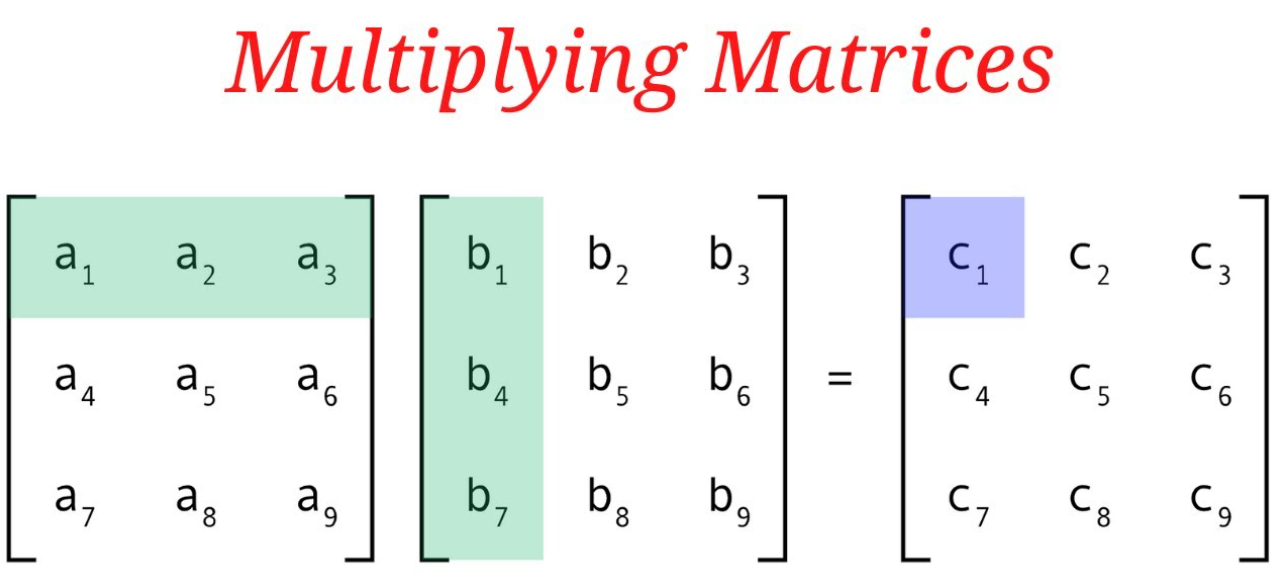

Compare methods of multiplying matrices

Spoiler alert: If **loops are bad** for performance, **triply nested loops** are **WORSE!**

## Naive triply nested loop
Below is the naive triply nexted loop code to multiply two arrays in python

In [ ]:
import numpy as np
import time

N = 500
a = np.random.rand(N, N)
b = np.random.rand(N, N)

speed = {}

t1=time.time()
N = a.shape[0]
c = np.zeros_like(a)
for i in range(N):
    for k in range(N):
        for j in range(N):
            c[i,j] += a[i,k] * b[k,j]
t2=time.time()
print("Matrix Mult Triply Nested Loop: {} secs".format(t2-t1))
speed['Triply Nested'] = t2-t1
c

## *Numpy.dot* method to multiply arrays

Compare this to one Numpy way to do the same task: numpy.dot

In [ ]:
# np.multiply exiplictly with numpy ufunc
t1=time.time()

c = np.dot(a,b)

t2=time.time()
print("With np.dot(a.T,b): {} secs".format(t2-t1))
speed['np.dot(a.T,b)'] = t2-t1
c

## *Numpy.matmul* to multiply arrays

We will compare the timing in a plot later

In [ ]:
# np.multiply exiplictly with numpy ufunc
t1=time.time()

c = np.matmul(a,b)

t2=time.time()
print("With np.matmul(a,b): {} secs".format(t2-t1))
speed['np.matmul(a,b)'] = t2-t1
c

## Try Scipy version Matrix Multiply

see
https://scipy.github.io/old-wiki/pages/PerformanceTips

Seems to be slower than numpy dot. But it is worth checking a couple libraries since we are going the rescue

In [ ]:
# try using numpy dot product

import scipy.linalg.blas as LA
t1 = time.time()
B = LA.sgemm(alpha=1.0, a= a, b= b )
#B = LA.dgemm(alpha=1.0, a= A[:,:,0], b= A[:,:,0], trans_a= False)
t2 = time.time()
print(t2-t1, "[s]")
speed['Scipy LA'] = t2-t1
B

In [ ]:
import matplotlib.pyplot as plt

timing = list(speed.values())
algo = list(speed.keys())

plt.figure(figsize=(10,6))
plt.title("Time taken to multiply {}x{} records in seconds".format(N,N),fontsize=12)
plt.ylabel("Time in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.xticks(rotation=-60)
bars = [i+1 for i in range(len(speed))]
print(bars) 
timing = [v for v in speed.values()]
print(timing)
algos = [v for v in speed.keys()]
print(algos)
plt.bar(x = bars, height= timing, align='center',tick_label= algos)
speedup = timing[0]/min(timing)

print("speedup {:,} X".format(int(np.round(speedup))))


It is very often a great idea to replace your custom loops with loops that other people have already analyzed and optimized. Matrix multiplication is a great example fo something that has been optimized very thoroughly - so find a fast version and use it. Like Numpy

## Show Numpy configs

Look to ensure Intel MKL or oneAPI is part of your configuration using show_config

In [ ]:
import numpy as np
np.show_config() 

# SciPy Experiments

Like scikit-learnex, when you can find ready made algorithms to accomplish your objective and others have already optimzied them you should take advantage

This is also the case with **Scitpy**.

There are too many algorithms in Scitpy to enumerate here. However, the goal of this notebook is to convince you that spending time in a searh engine or on the scipy website may be more fruitful than hours of programming

The goal here is to provide a few algortithms in the nested loop formulations and have you decribe their behavior. Then search for that behavior online with packages such as Scipy. And have you implement pre-optimized versions

# All Pairs Shortest Path

Below is a naive approach for finding all pairs shortest paths in a directed weighted graph. A single execution of the algorithm will find the lengths (summed weights) of shortest paths between all pairs of vertices. 

It is a triply nested loop, much like Matrix Multiply, but instead of multiplying it applies a min operator

While you can try to experiment with finding good vectorized ways of optimizing with Numpy - it is smarter to look for people who have spent their careers and lively hood finding faster methods. In this case - we will demonstrate a simple implementation using a triply nested loop, and then try to find an algorithm that does the job. 

All pairs shortest path is NOT the same as pairwise distance in the grph explained in the video. In the video all vertices were connected. Here the their a weights to the edges and when an edge is made very large - it could represent two cities separated by a body of water so that no edge connects them driectly. To Get to city C you must got from A to B then to C and not directly from A to C

In [ ]:
# Number of vertices
import numpy as np
import time 

INF = 999

# Algorithm - naive
def floyd_naive(G):
    dist = list(map(lambda p: list(map(lambda q: q, p)), G))
    nV = G.shape[0]
    # Adding vertices individually
    for r in range(nV):
        for p in range(nV):
            for q in range(nV):
                dist[p][q] = min(dist[p][q], dist[p][r] + dist[r][q])
    #sol(dist)
    return np.array(dist)

# Printing the output
def print_solution(dist, nV=4):
    for q in range(nV):
        for p in range(nV):
            if(dist[p][q] == INF):
                print("INF", end=" ")
            else:
                print(dist[p][q], end="  ")
        print(" ")

# G = np.array(
#         [[0, 5, INF, INF],
#          [50, 0, 15, 5],
#          [30, INF, 0, 15],
#          [15, INF, 5, 0]])

np.random.seed(2022)
nV = 500
G = np.random.randint(1, 400 , nV*nV).reshape(nV, nV)
np.fill_diagonal(G, 0)
G[27,33] = INF
G[127,33] = INF
G[227,33] = INF
G[327,33] = INF
G[27,133] = INF
G[27,233] = INF
G[27,333] = INF

speed = []
algo = []
t1 = time.time()
dist = floyd_naive(G)
t2 = time.time()
print(" floyd_naive {} secs".format(t2-t1))
speed.append(t2-t1)
algo.append('floyd_naive')
print_solution(dist, 4)



Before we attemp to use nupy to try to encode this loop in some vactor approach.

Lets examine the wider domain of knowledge looking for insights

Here is a **search engine result** looking up the phrase:

- **All Pairs Shortest Path**

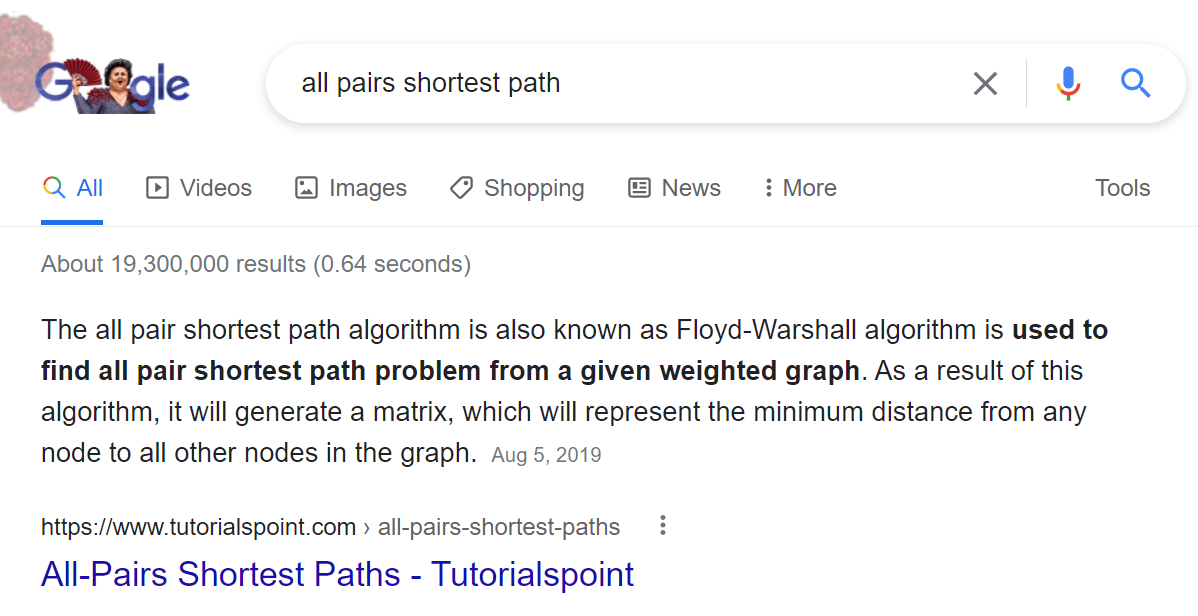

This brings up an interesting looking algorithm name: **Floyd-Warshall algorithm**

Read a bit about the alogirithm

See if someone has encoded it in alibrary - especially a common well oiled one like Scpy

Aha!

A search within scipy turns up two hits:
- Dijkstra
- Floyd-Warshall

Let's look at Floyd's:
- from scipy.sparse import csr_matrix
- from scipy.sparse.csgraph import floyd_warshall
- graph = csr_matrix(graph)

Looks easy enough, and seems to fit

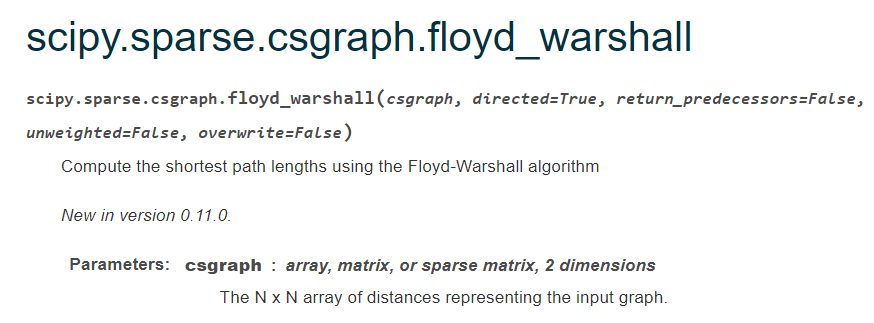

Now we get the same results, hundreds of times faster, the code is more readbale, it will ride on top of new acceleration advances most likely - let's try it

In [ ]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall

t1 = time.time()
dist_matrix, predecessors = floyd_warshall(csgraph = G, directed=True, return_predecessors=True)
t2 = time.time()
print("scipy floyd_warshall {} secs".format(t2-t1))
speed.append(t2-t1)
algo.append('scipy floyd_warshall')
dist_matrix.T[:4, :4]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.ylabel("Time taken to process 1 million records in seconds",fontsize=12)
plt.xlabel("Various types of operations",fontsize=14)
plt.grid(True)
plt.xticks(rotation=-60)
plt.bar(x = [1,2], height=speed, align='center',tick_label=algo)
print("acceleration: {:4.0f} X".format(speed[0]/speed[-1]))

# Scipy: Find Eigenvalues /Vectors 

Google's founders with the **Page rank algorithm** is essentailly a multibillion dollar Eignvalues cash cow.

Eigenvalues and eigen vectors provide means of solving differntial equations, solving othersie time consuming operations involving raising transition matrices to high powers and many, many other applications. You should wiegh carefully any decision to roll your own eigenvalue solver. Take advantage pre-optimized versions first!

Question:
**whats the fastest way to find eigenvalues/vectors in python?**
[stack overflow - use the linear algebra library in SciPy](https://stackoverflow.com/questions/6684238/whats-the-fastest-way-to-find-eigenvalues-vectors-in-python)

[**Medium.com** What Exactly Eigenvalues and Eigenvectors are?](
https://medium.com/swlh/eigen-theory-from-the-scratch-a73e0b5a25da)

It is sometimes worth experimenting to see whether the **Numpy** or **Scipy** version of a routine is faster

Sometimes you just go for Numpy or Scipy alogorithms for convenience becasue reinventing the wheel will almost certainly be slower and prone to errors - Just assume we get performance and move on!

If there are two approaches - one in Scipy and one in Numpy then you should race the two and see who wins


In [ ]:
from scipy import linalg as LA
import time

A = np.random.randint(1, 10, 25000000).reshape(5000, 5000)
t1=time.time()
e_vals, e_vecs = LA.eig(A)
t2=time.time()
print("LA.eig(A) {} secs".format(t2-t1))

t1=time.time()
np.linalg.eigvals(A)
t2=time.time()
print("np.linalg.eigval {} secs".format(t2-t1))

# Show Scipy configs

Look to ensure Intel MKL or oneAPI is part of your configuration using show_configLook to ensure Intel MKL or oneAPI is part of your configuration using show_config

In [ ]:
import scipy as sp

sp.show_config()

# Code for Slides

In [ ]:
import numpy as np
import time
N = 100
a = np.arange(N)
sum = []
s = 0
for i in range (N):
    s += a[i]
    sum.append(s)

In [ ]:
a = np.arange(100_000_000)
t1 = time.time()
b =  np.arange(50_000_002)
N = len(a)
for i in range (N):
    if i % 2 == 0:
        b[i//2] = a[i]
t2 = time.time()
print("Elapsed: ",t2 - t1)
tloop = t2 - t1
b[:5]

In [ ]:
import numpy as np

a = np.arange(100_000_000)
t1 = time.time()

b = a[::2]

t2 = time.time()

print("Elapsed: ",t2 - t1)
tnumpy = t2 - t1
b[:5]

In [ ]:
tloop/tnumpy

In [ ]:
a = np.arange(0,9)
a = np.power(1.j, a)
a.reshape(9,1) * a.reshape(1,9)

In [ ]:
import scipy.linalg
import numpy as np
scipy.linalg.dft(4)

In [ ]:
print("Done")